In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', font='monospace')

In [2]:
df = pd.read_csv('data.csv')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

In [56]:
def plot_single_variable(data, var, color):
    q1, q3 = data[var].quantile(0.25), data[var].quantile(0.75)
    iqr = q3 - q1
    df_wo_outliers = data[(data[var] >= q1 - 1.5*iqr) & (data[var] <= q3 + 1.5*iqr)]
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    axes.ravel()[0].set_title('W/ Outliers')
    axes.ravel()[1].set_title('W/O Outliers')
  
    sns.histplot(data=df, x=var, kde=True, bins=60, color=color, alpha=0.7, ax=axes[0, 0])
    sns.histplot(data=df_wo_outliers, x=var, kde=True, bins=60, color=color, alpha=0.7, ax=axes[0, 1])
    sns.violinplot(data=df, x=var, color=color, alpha=0.7, ax=axes[1, 0])
    sns.violinplot(data=df_wo_outliers, x=var, color=color, alpha=0.7, ax=axes[1, 1])

## Single Variable Distributions (Existing Features)

---

### **Variables**: `wins` and `losses`

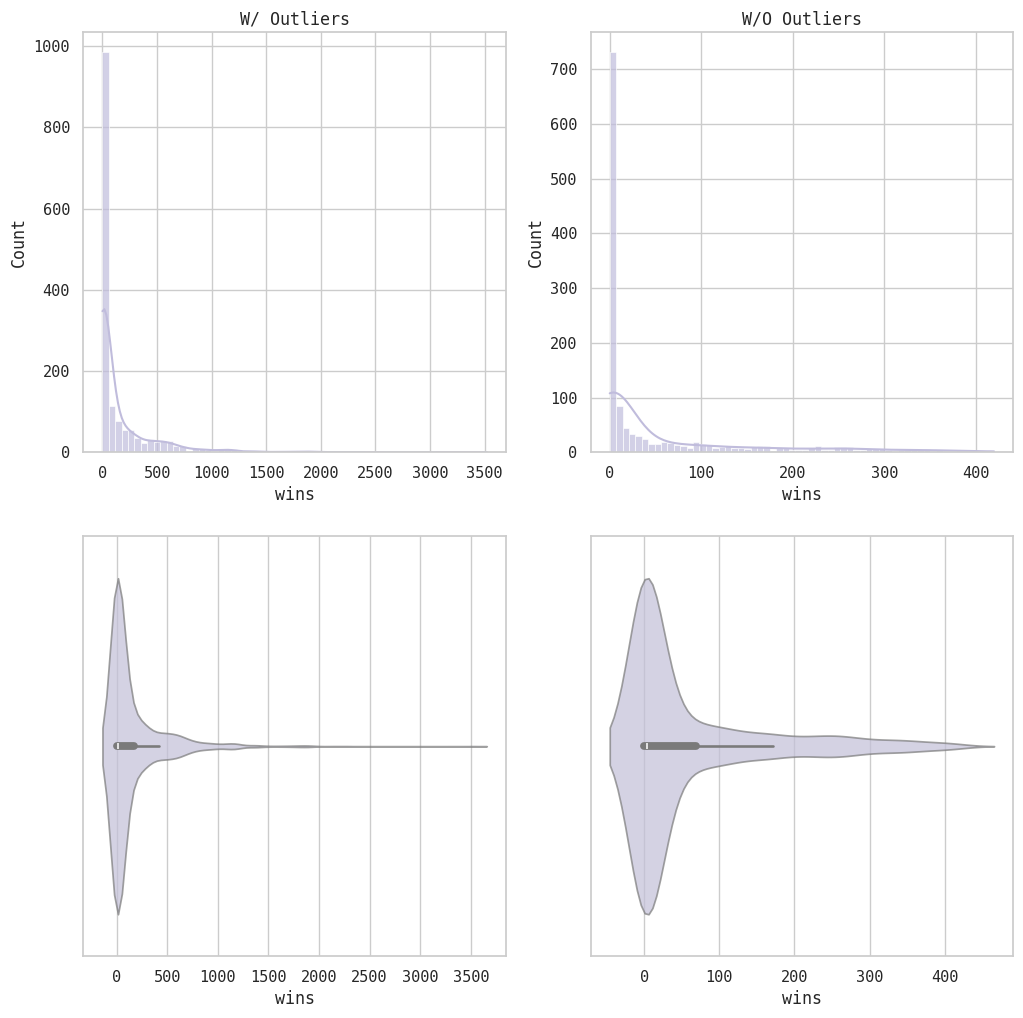

In [57]:
plot_single_variable(data=df, var='wins', color='#c0bcdc')

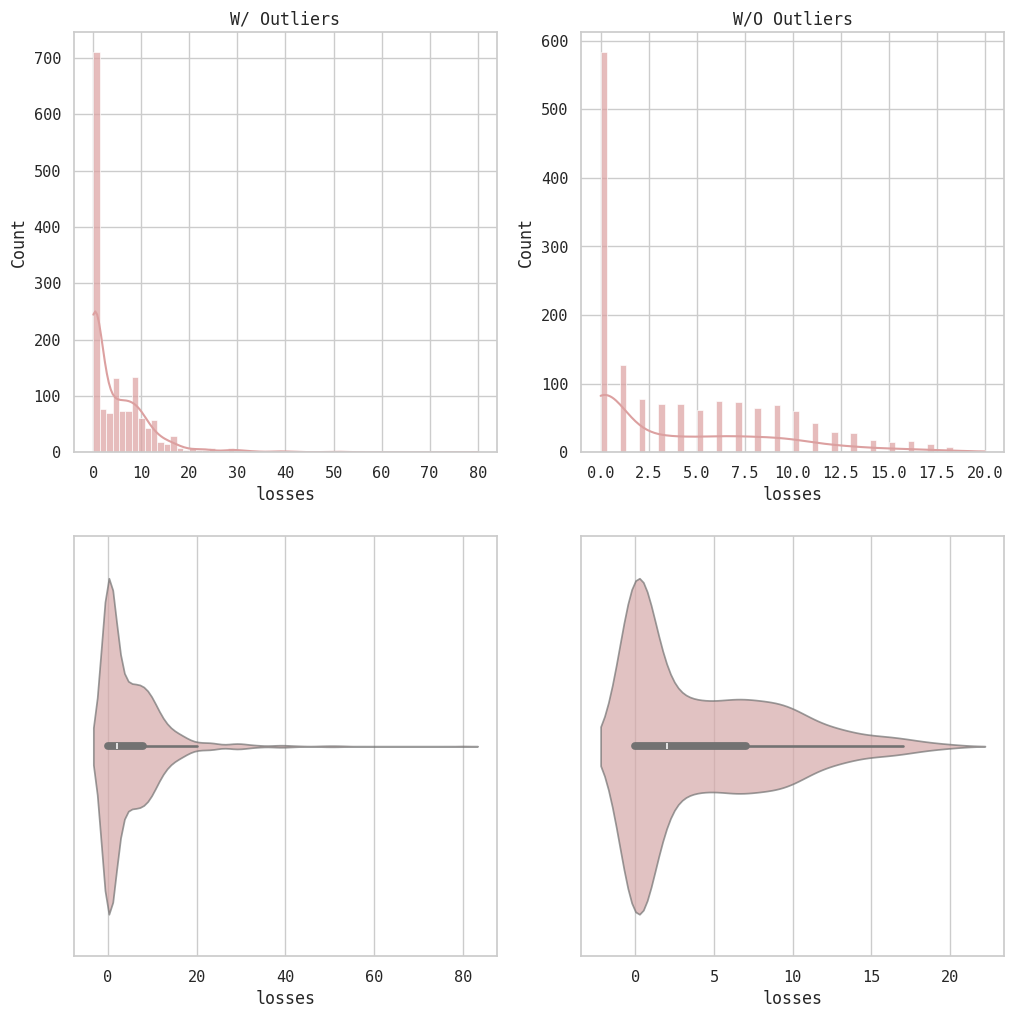

In [58]:
plot_single_variable(data=df, var='losses', color='#dca0a0')

### **Variables**: `kills`, `deaths`, `assists`, `kdRatio`, `scorePerMinute` and `killStreak`

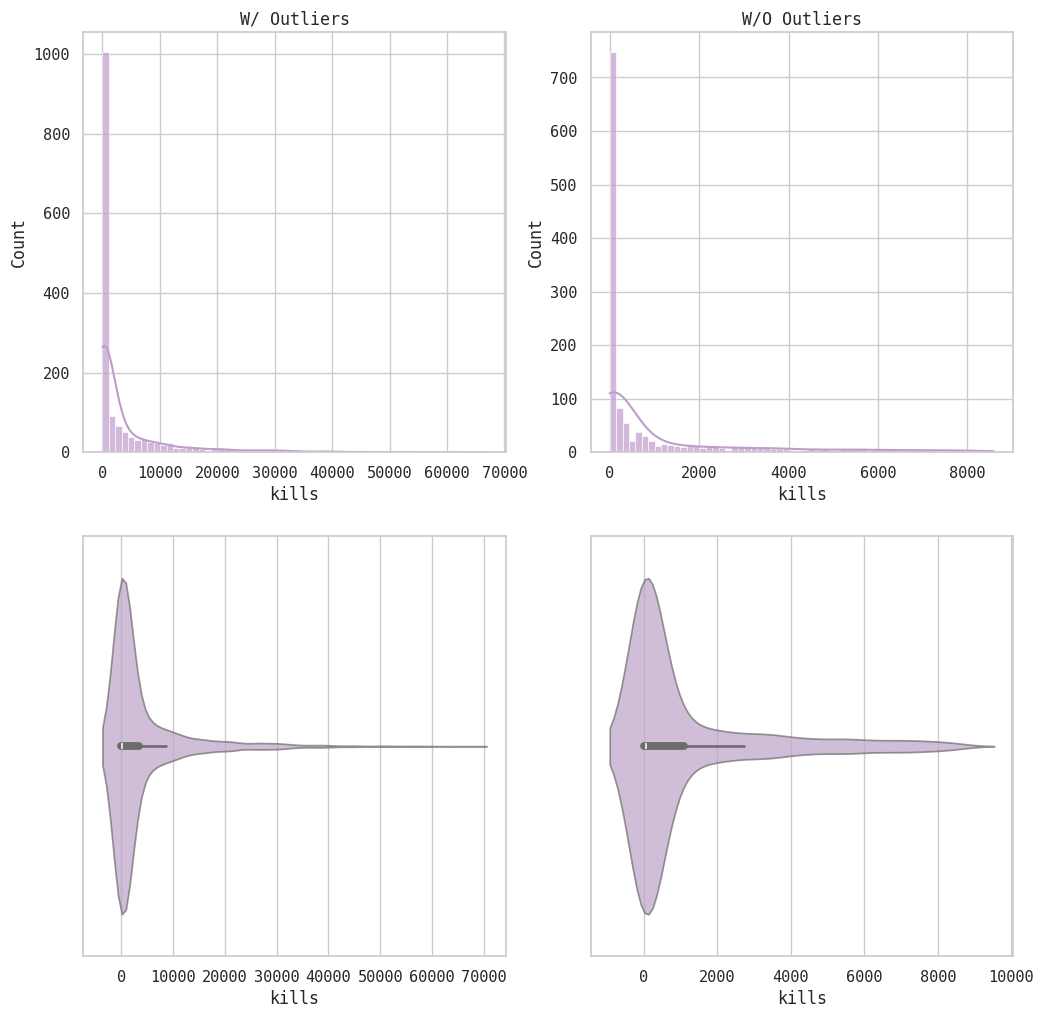

In [59]:
plot_single_variable(data=df, var='kills', color='#c09ccc')

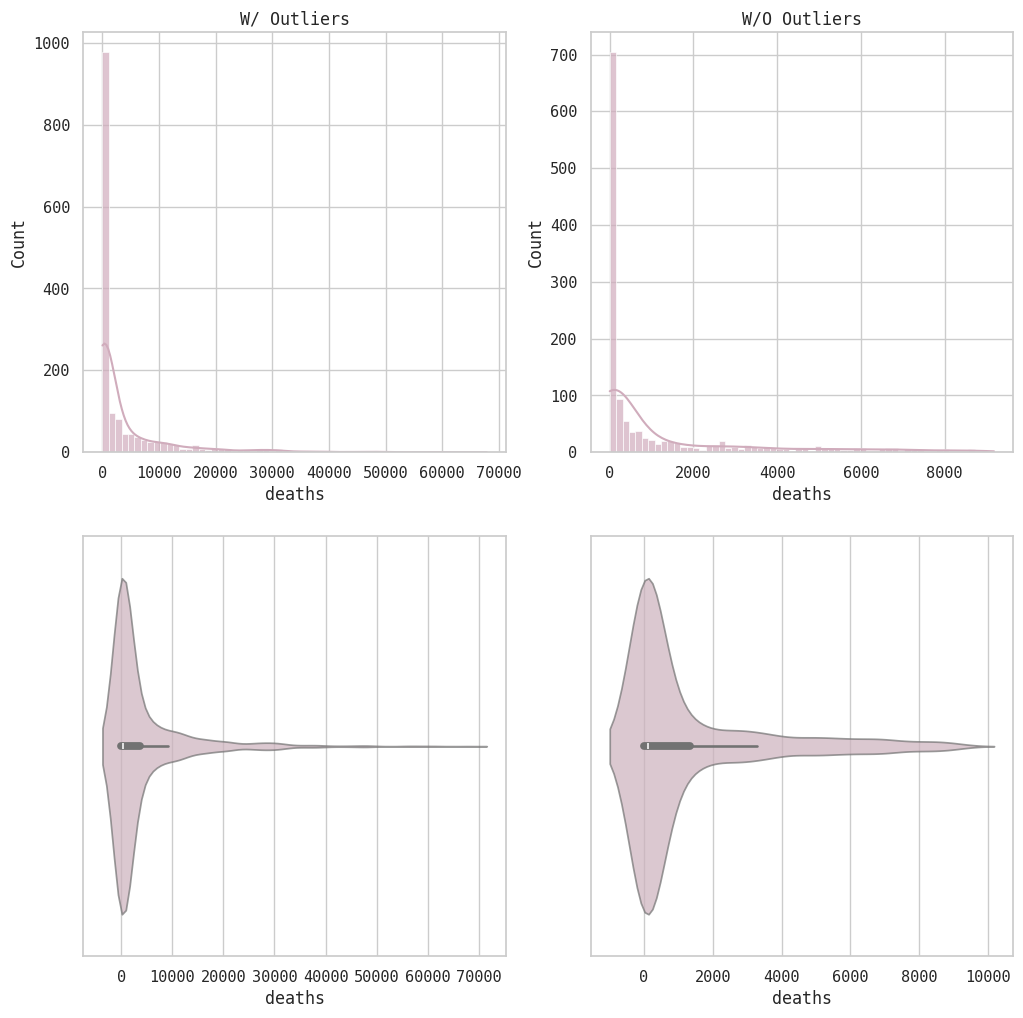

In [60]:
plot_single_variable(data=df, var='deaths', color='#d0acbc')

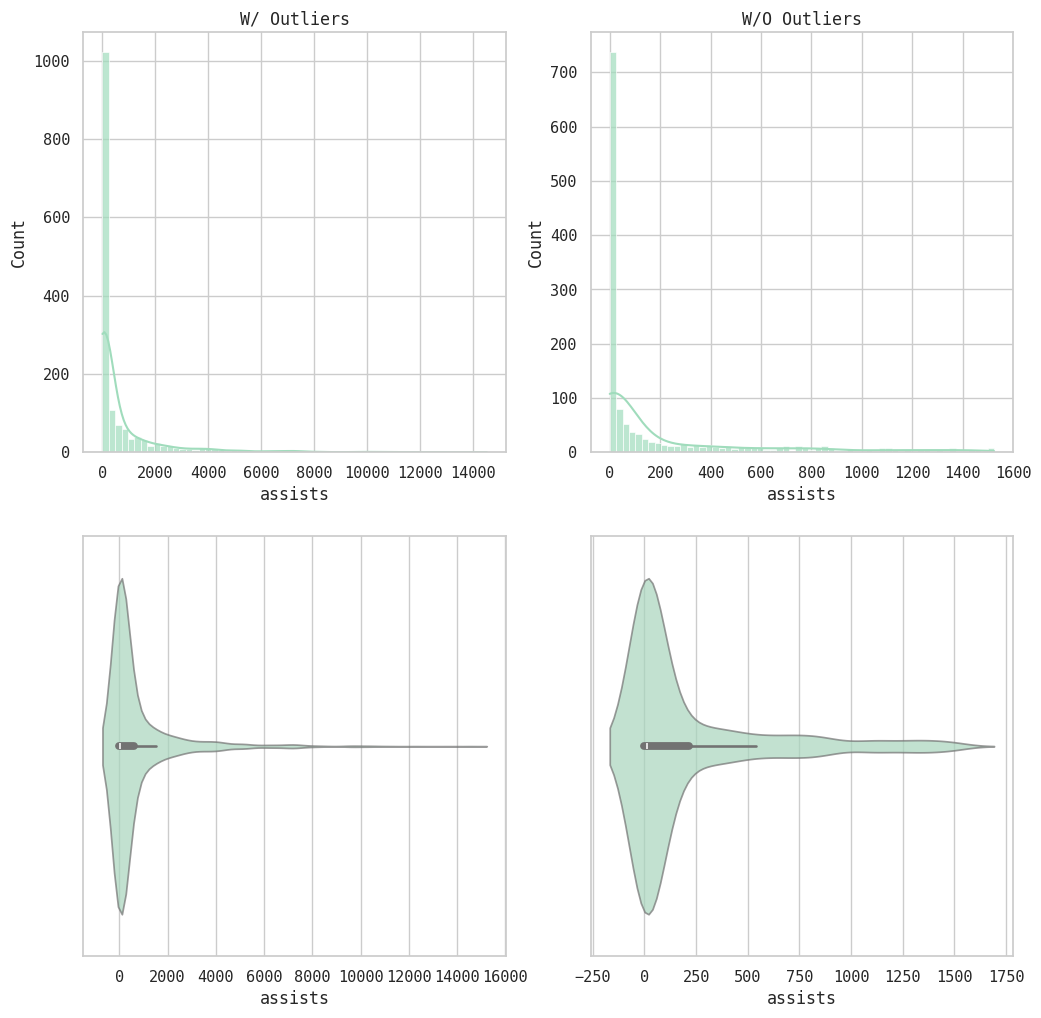

In [61]:
plot_single_variable(data=df, var='assists', color='#a0dcbc')

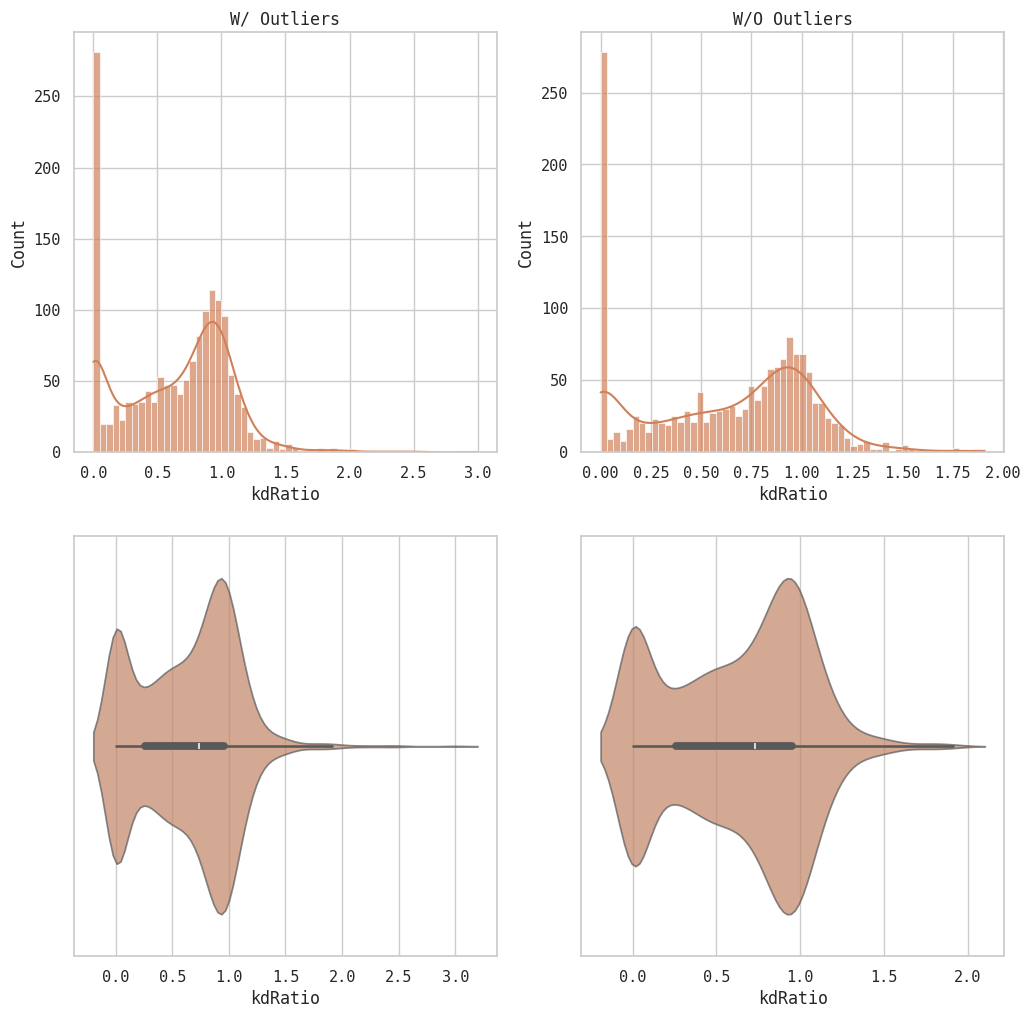

In [62]:
plot_single_variable(data=df, var='kdRatio', color='#d08058')

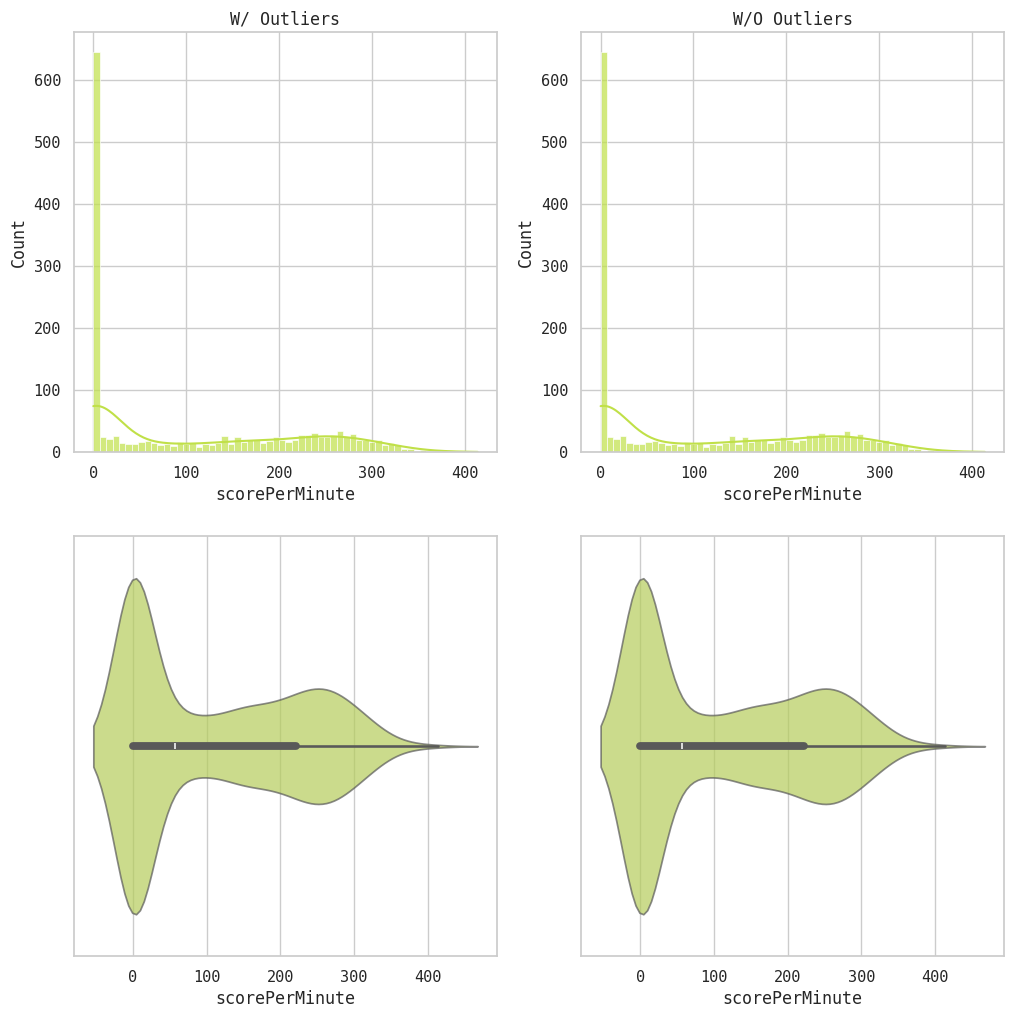

In [77]:
plot_single_variable(data=df, var='scorePerMinute', color='#c0e048')

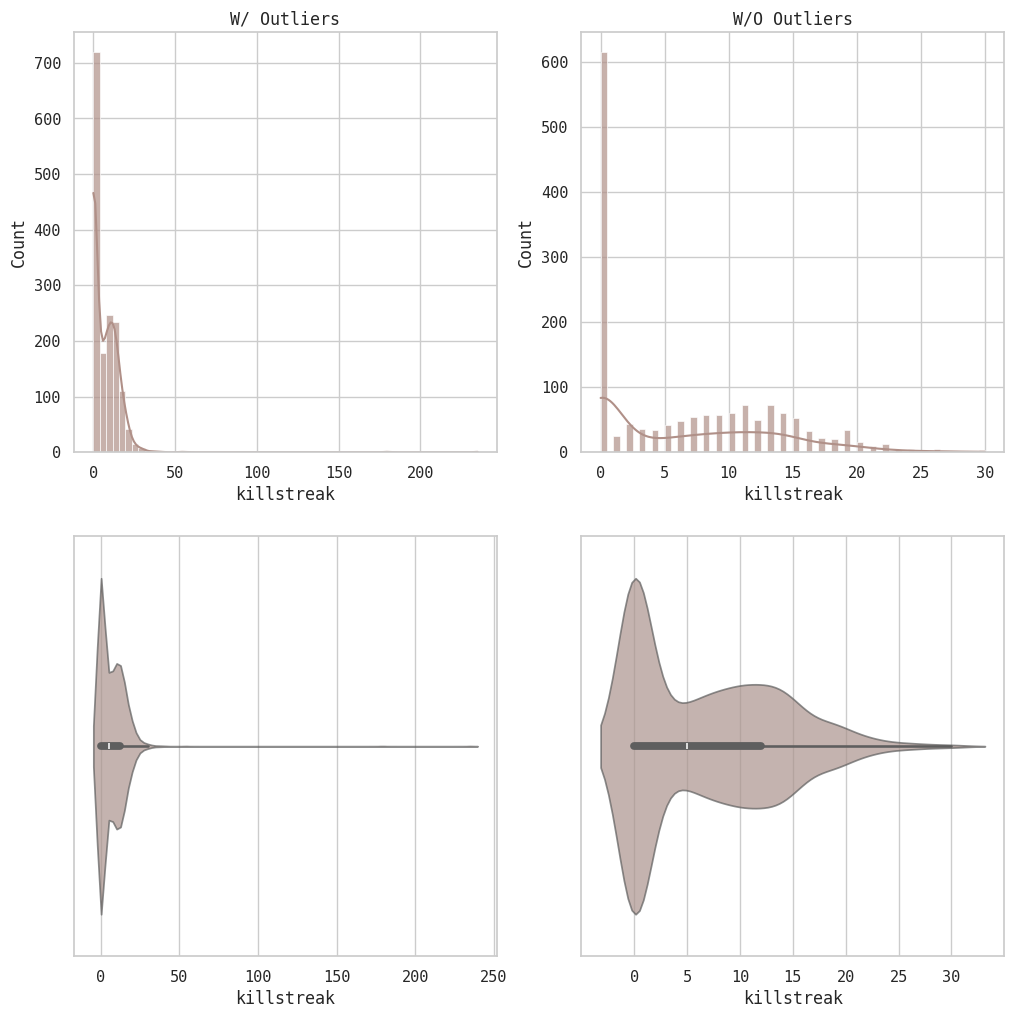

In [63]:
plot_single_variable(data=df, var='killstreak', color='#b09088')

### **Variables**: `level`, `prestige`, and `xp`

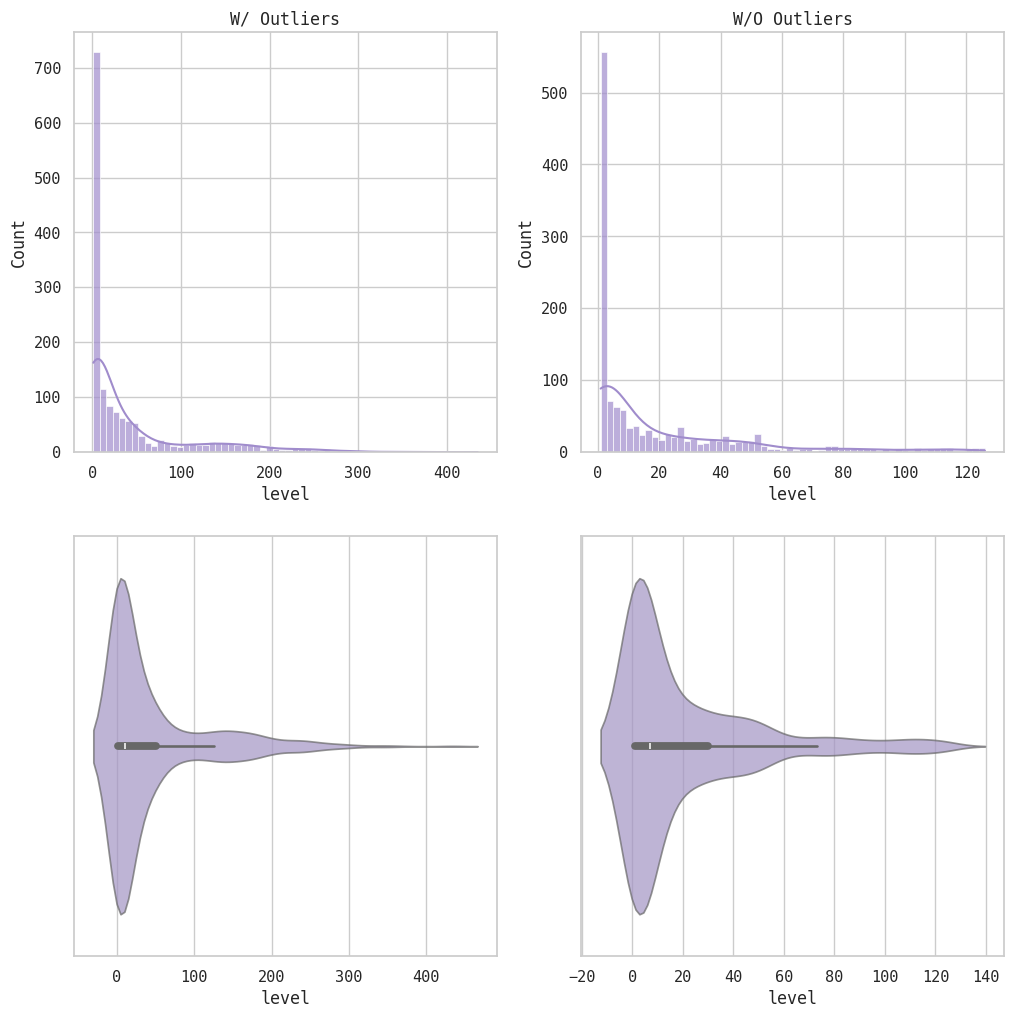

In [66]:
plot_single_variable(data=df, var='level', color='#a08ccc')

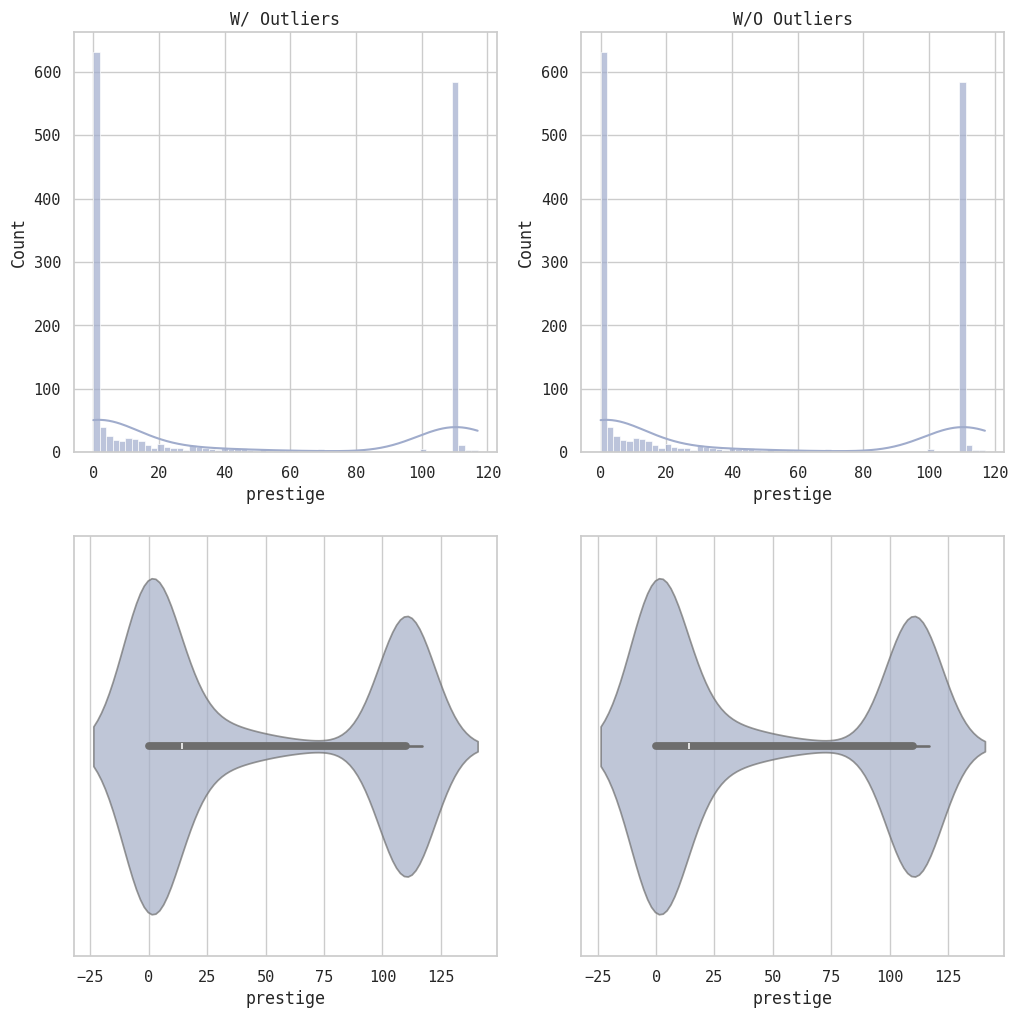

In [67]:
plot_single_variable(data=df, var='prestige', color='#a0accc')

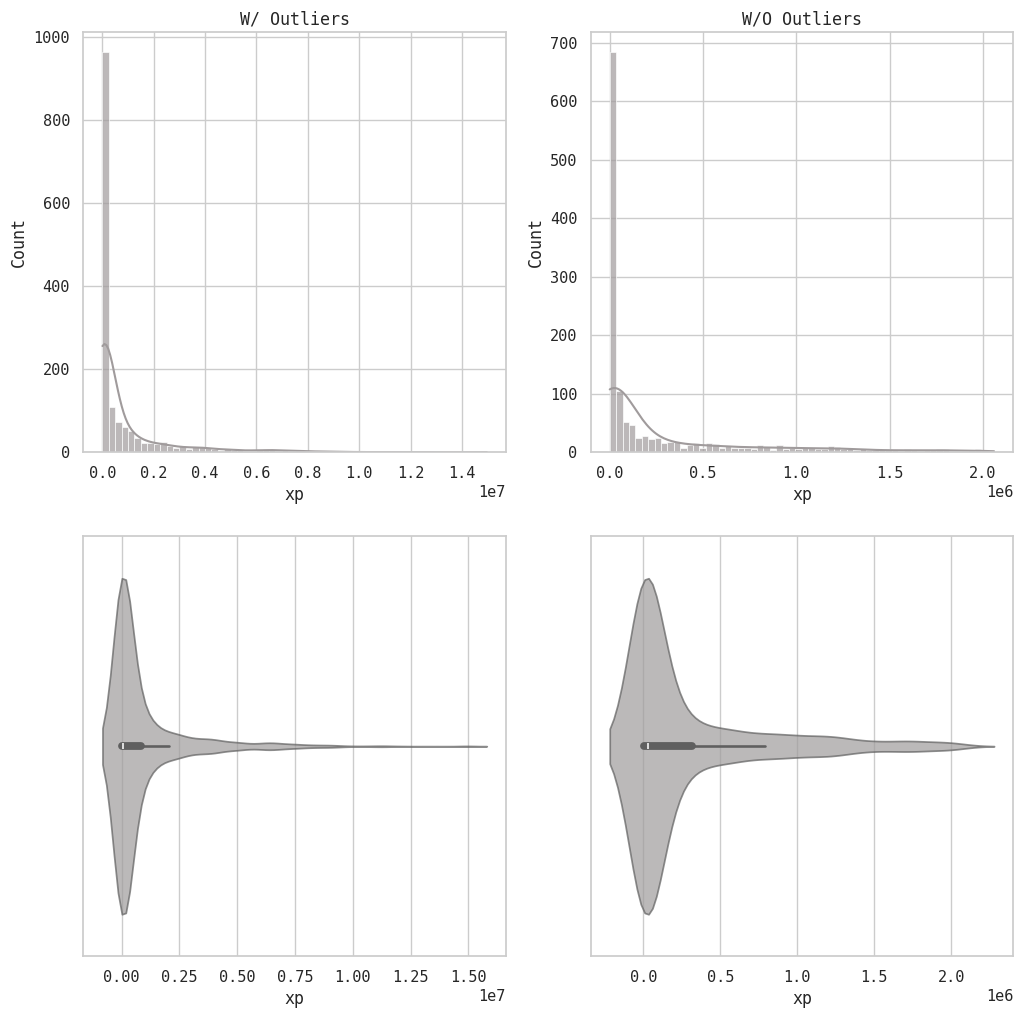

In [70]:
plot_single_variable(data=df, var='xp', color='#a09b9c')

### **Variables**: `hits`, `misses`, `headshots` and `shots`

> Note that `shots` is the sum of `hits` and `misses`.

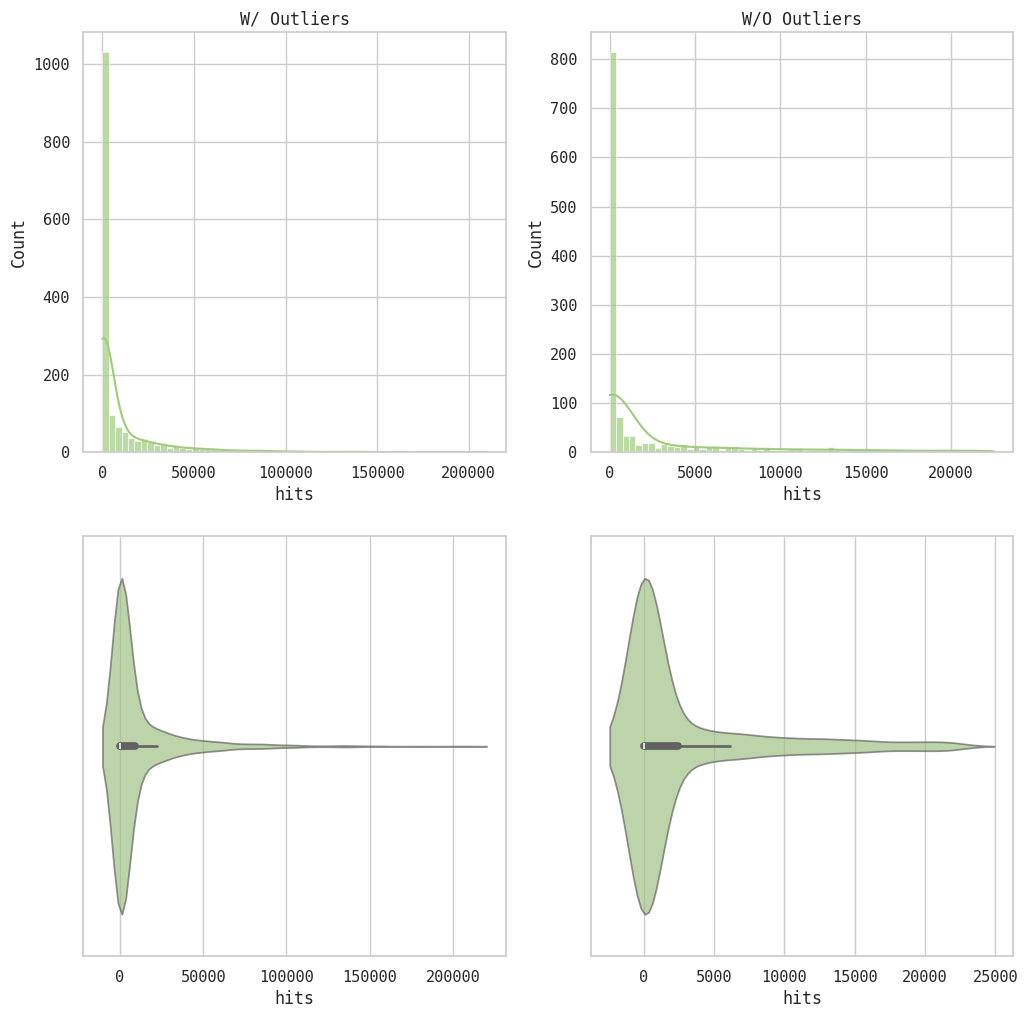

In [81]:
plot_single_variable(data=df, var='hits', color='#a0cb7c')

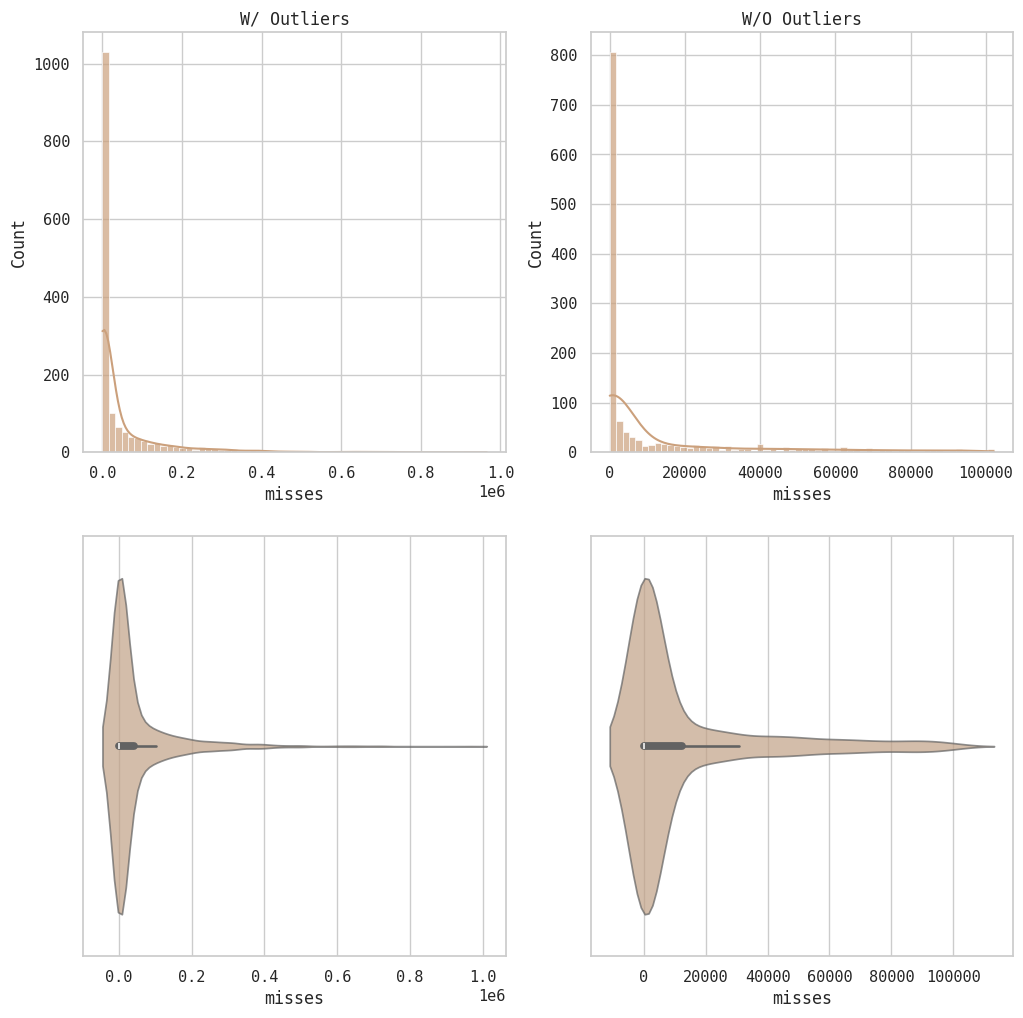

In [83]:
plot_single_variable(data=df, var='misses', color='#cba07c')

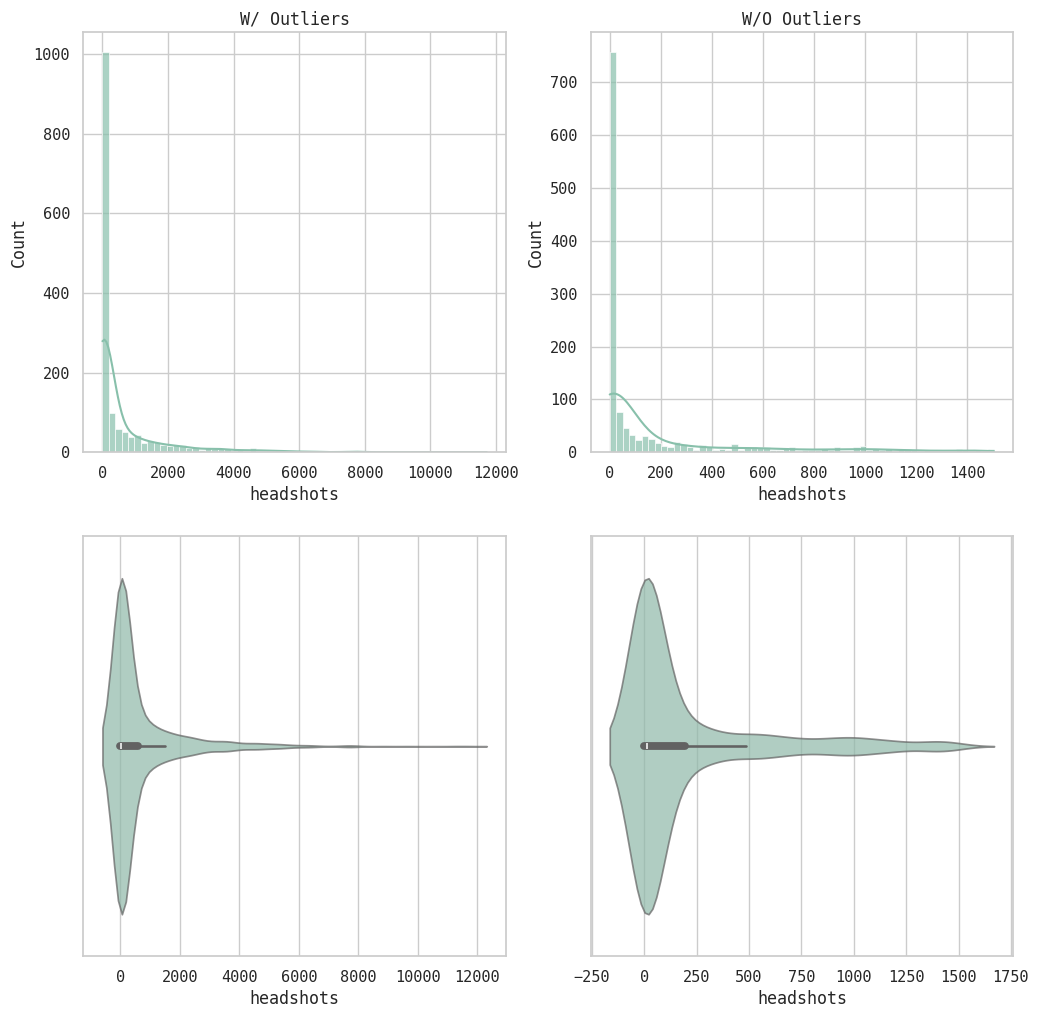

In [86]:
plot_single_variable(data=df, var='headshots', color='#88c0ab')

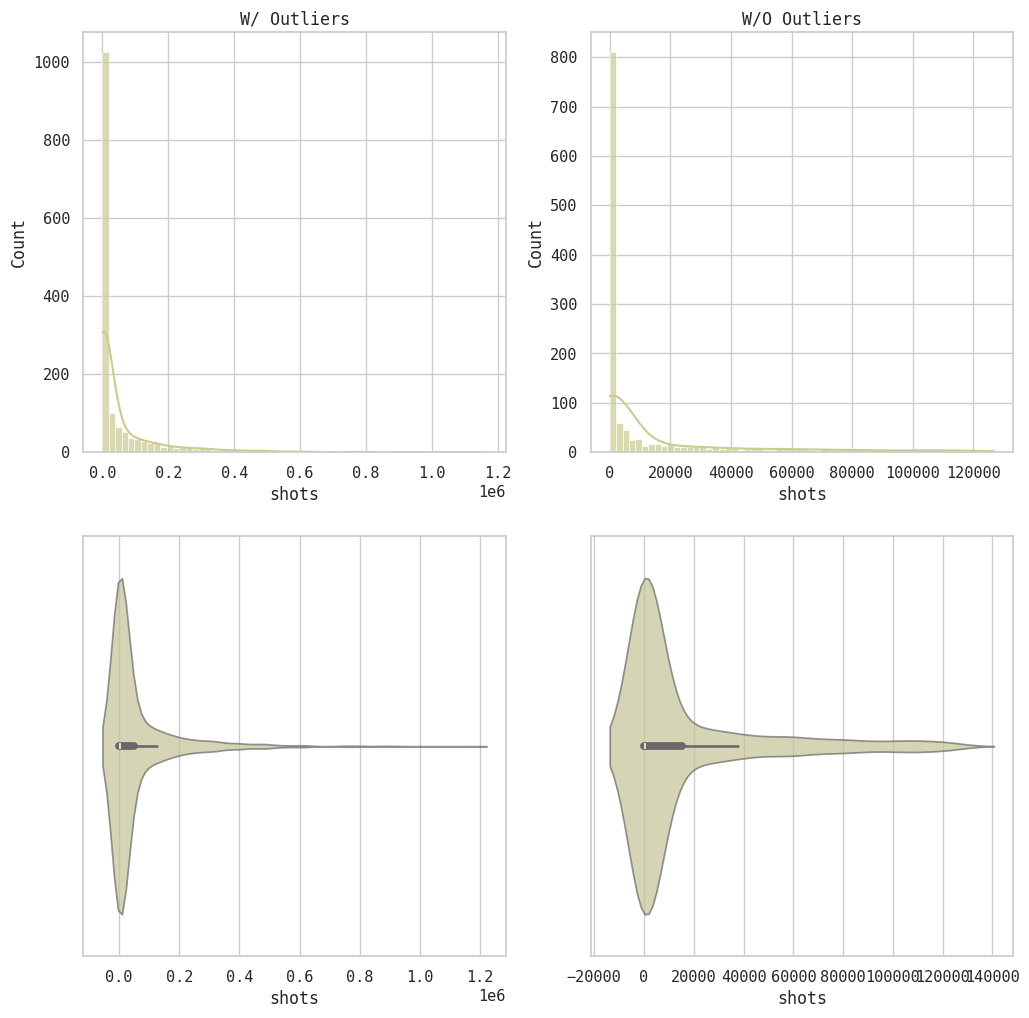

In [84]:
plot_single_variable(data=df, var='shots', color='#cbcb90')

### **Variables**: `timePlayed`, `averageTime`, and `gamesPlayed`

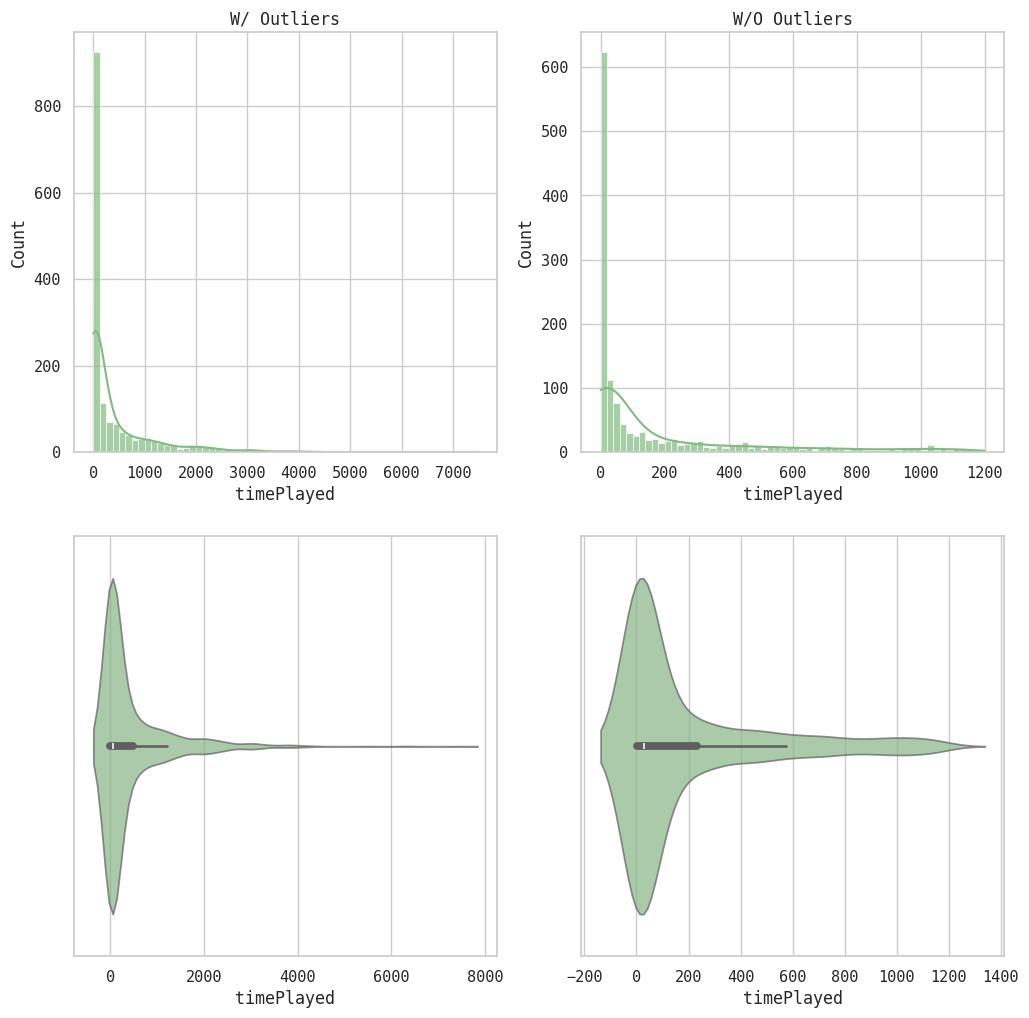

In [89]:
plot_single_variable(data=df, var='timePlayed', color='#80bb80')

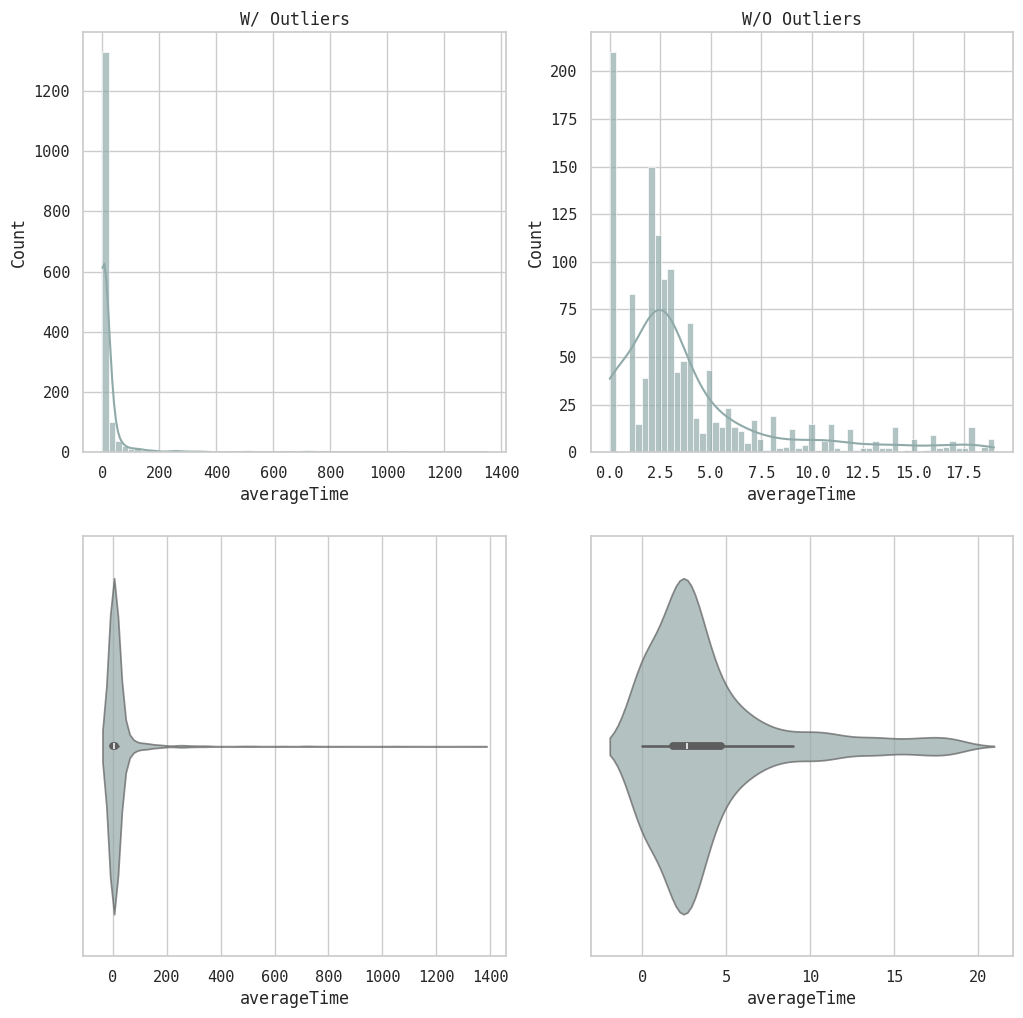

In [91]:
plot_single_variable(data=df, var='averageTime', color='#90aaaa')

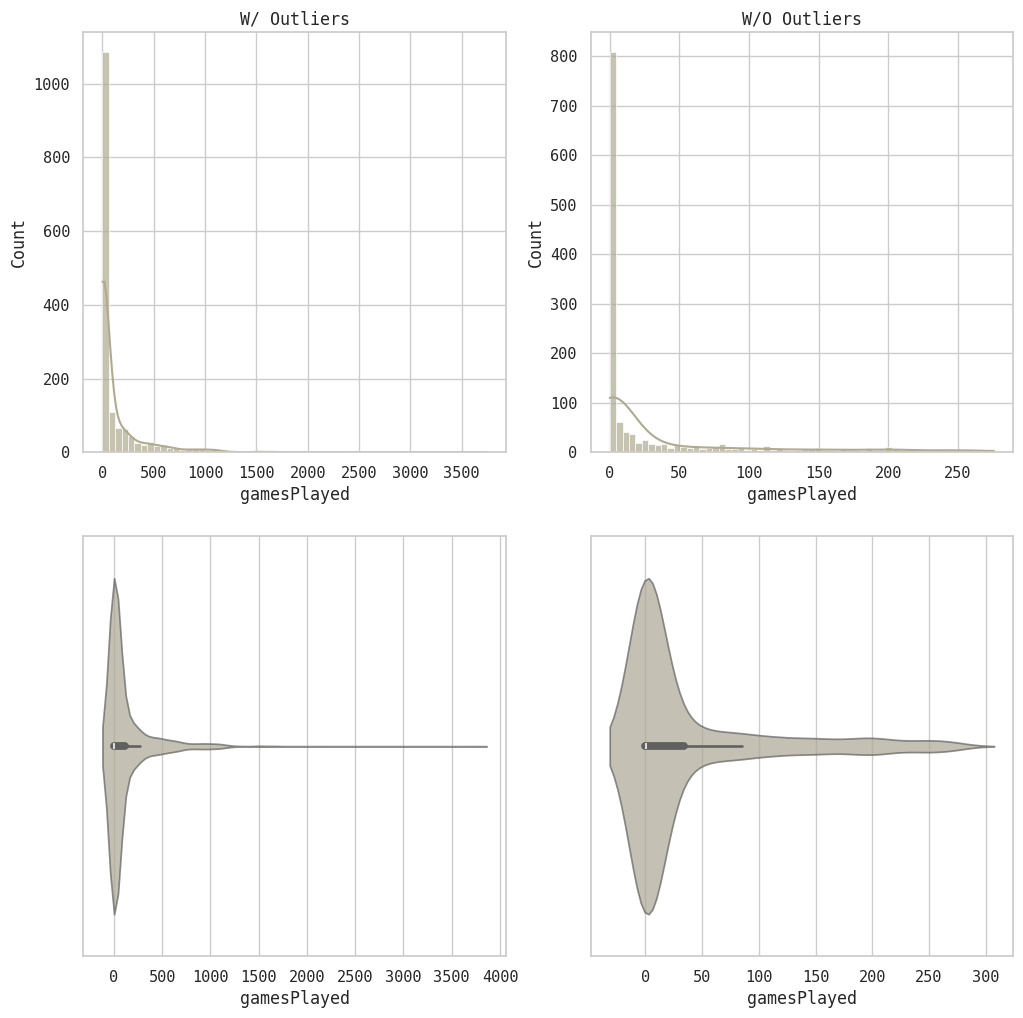

In [95]:
plot_single_variable(data=df, var='gamesPlayed', color='#b0aa90')

## Single Variable Distributions (Engineered Features)

---

### Definitions

- `winRate`: `wins` / (`wins` + `loses`)
- `killsPerGame` : `kills` / `gamesPlayed`
- `deathsPerGame` : `deaths` / `gamesPlayed`
- `assistsPerGame` : `assists` / `gamesPlayed`
- `hitRate`: `hits` / `shots`
- `headshotRate` : `headshots` / `shots`

In [100]:
df['winRate']        = df['wins'] / (df['wins'] + df['losses'])
df['killsPerGame']   = df['kills'] / df['gamesPlayed']
df['deathsPerGame']  = df['deaths'] / df['gamesPlayed']
df['assistsPerGame'] = df['assists'] / df['gamesPlayed']
df['hitRate']        = df['hits'] / df['shots']
df['headshotRate']   = df['headshots'] / df['shots']

In [104]:
df.replace([np.nan, np.inf], 0, inplace=True)

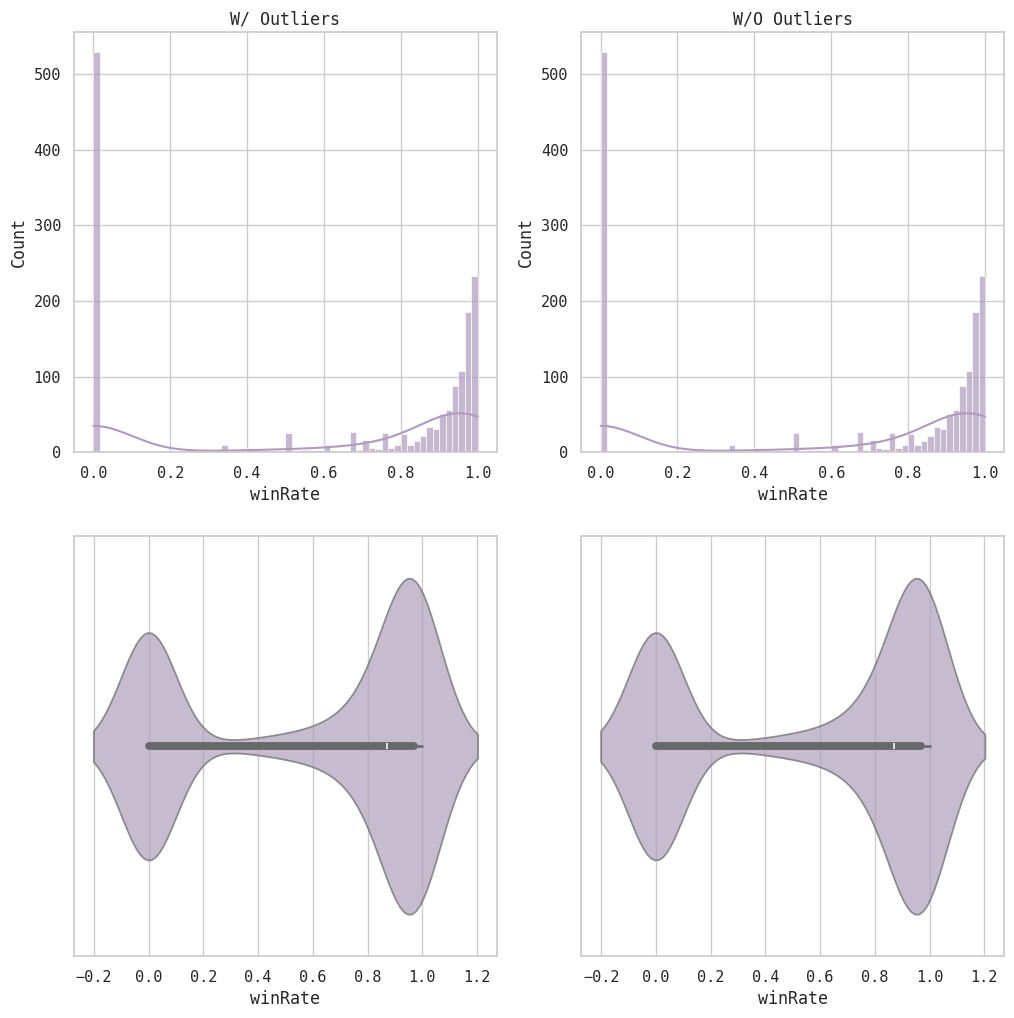

In [108]:
plot_single_variable(data=df, var='winRate', color='#b09ac0')

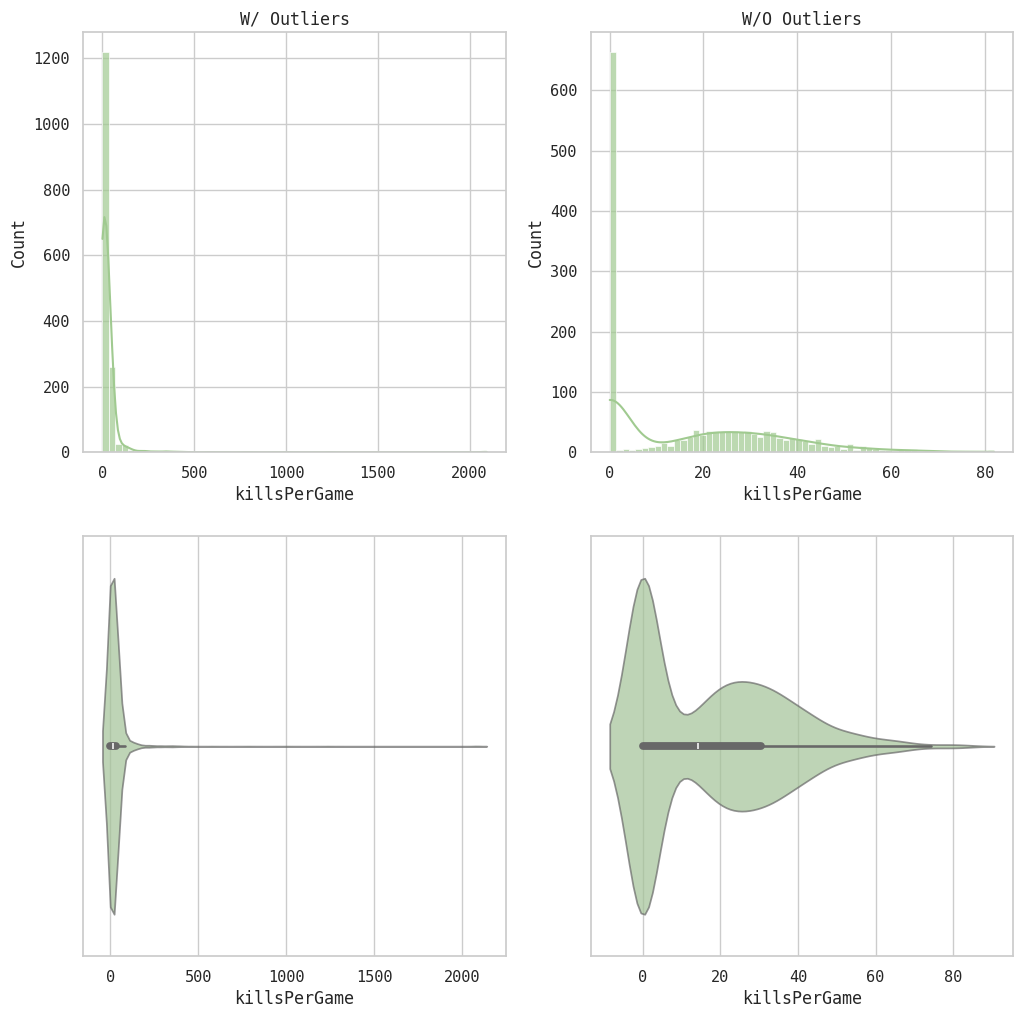

In [109]:
plot_single_variable(data=df, var='killsPerGame', color='#a0ca90')

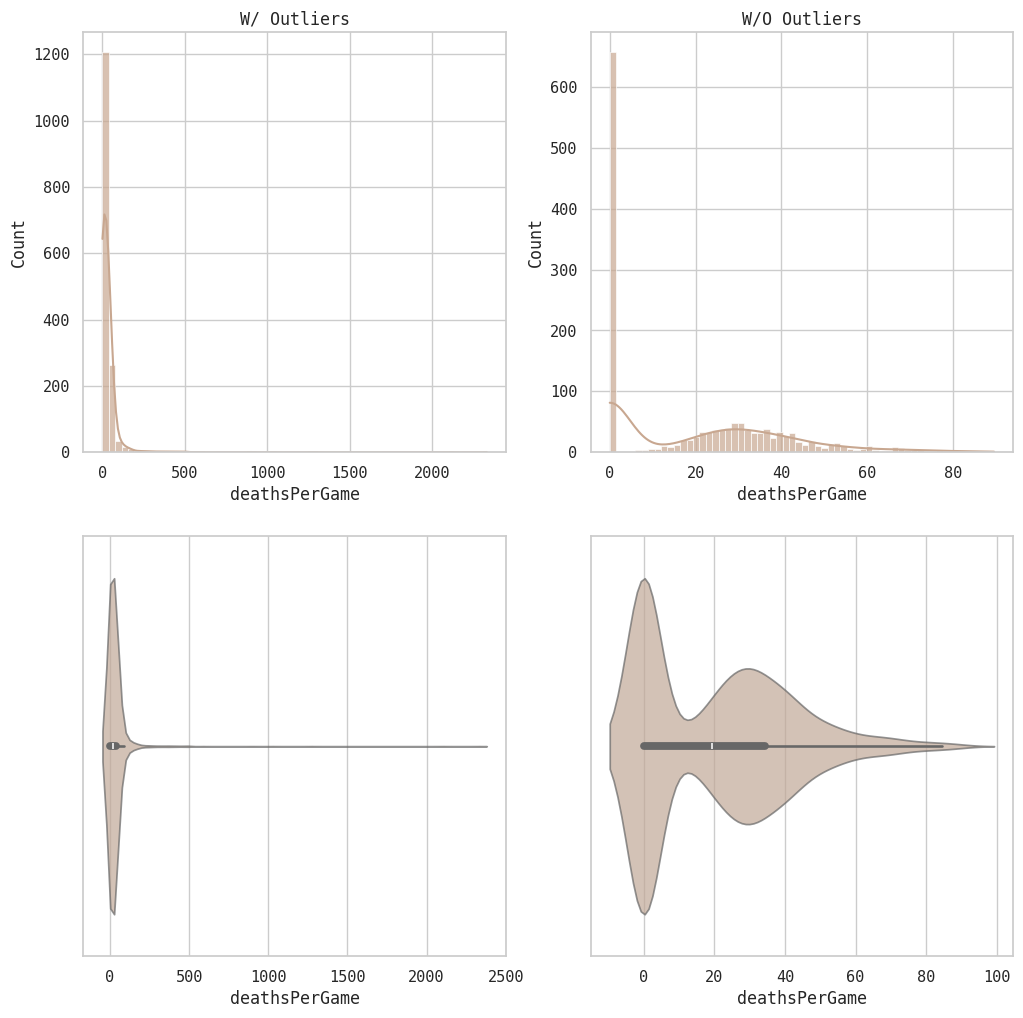

In [111]:
plot_single_variable(data=df, var='deathsPerGame', color='#c8a790')

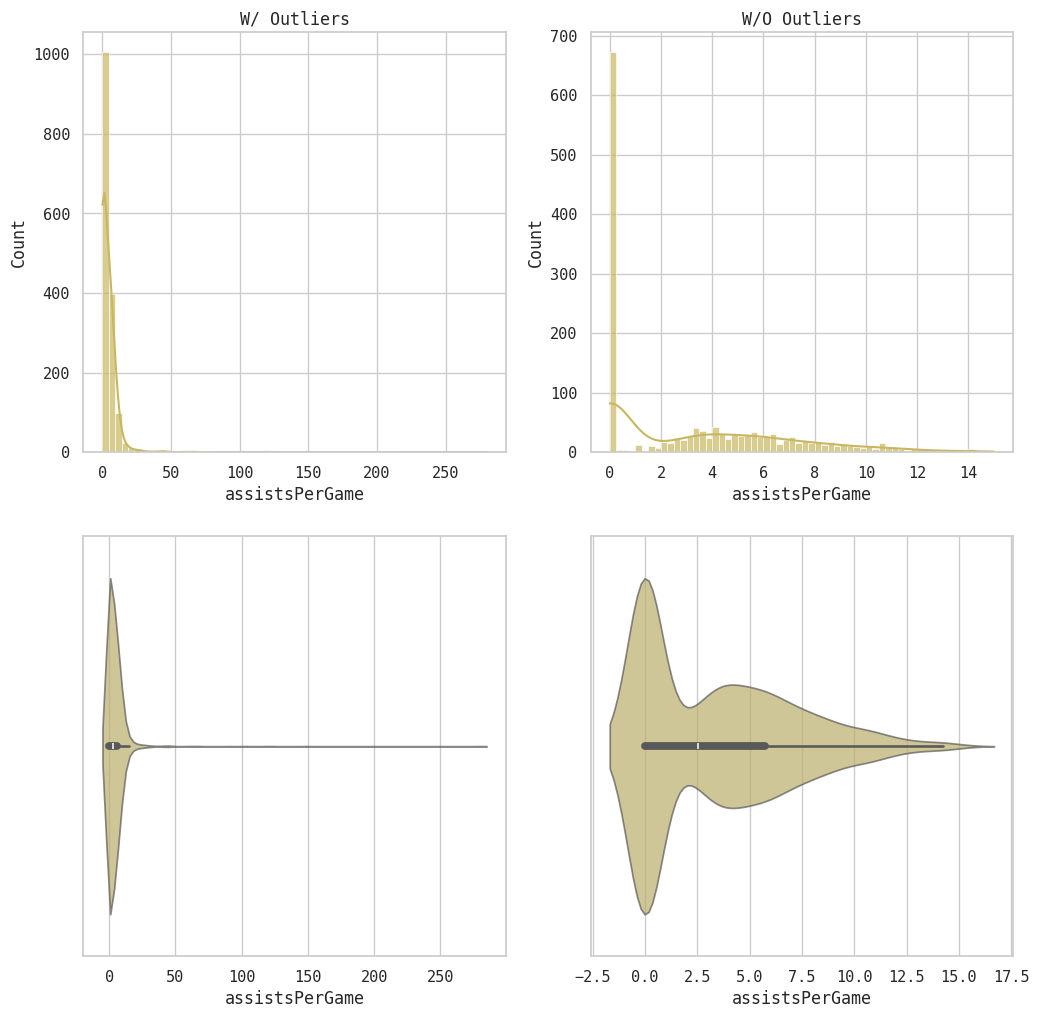

In [112]:
plot_single_variable(data=df, var='assistsPerGame', color='#c8b760')

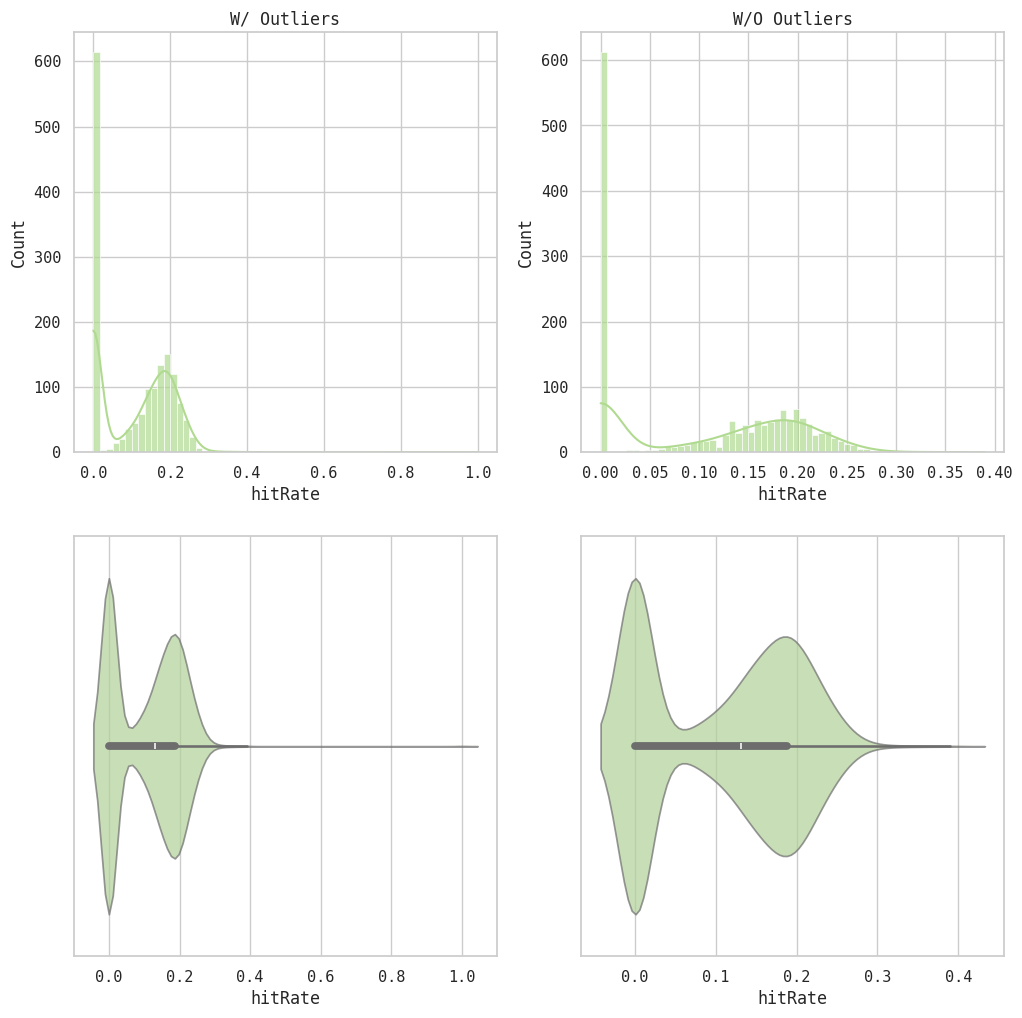

In [113]:
plot_single_variable(data=df, var='hitRate', color='#b0da90')

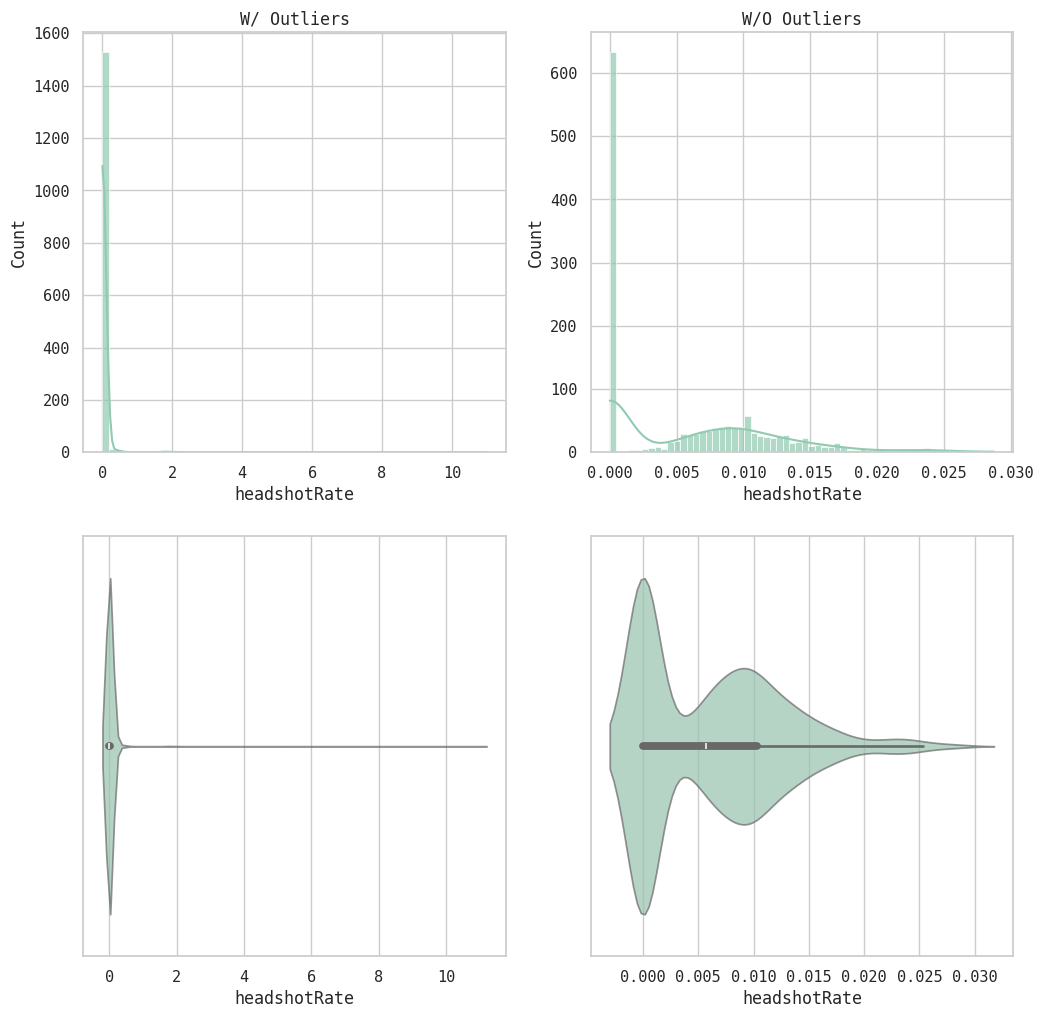

In [114]:
plot_single_variable(data=df, var='headshotRate', color='#90cab0')